# Capstone Check in 3

-----------------------
##  Main goal of the project (problem statement)
(modified form check in 2)

1. **What to cook for breakfast/lunch/dinner?** <br>
Given certain ingradients by user, computer will search through the recipe dataset and find the mamimum number of matched for the ingradient.  Return top three matches. 
    
2. Find the best recommandation of recipes. 
Given a discription of user about the food, computer will recommend the best recipe with best matching for the desprition. (using cosine similarity or othe models to find best match)


3. (optional) Generate a unique cooking recipe from machine learing.
After analyzing hundreds of thousands of recipes and reviews, computer should be able to generate its own recipes, expected to have the best ratings.
    
    
    
## Outlines of the proposed methods and models

The primary tools used were Pandas, Numpy, Seaborn, and
Unsupervised learing. The dataset used was acquired from Food.com (formerly GeniusKitchen). This dataset consists of 170K+ recipes and 1M+ recipe reviews covering 18 years of user interactions and uploads on Food.com (formerly GeniusKitchen). Pandas will be heavily used to explore and preprocess the dataset, and Seaborn and matplotlibs
for visualizations.

## Defines the risks & assumptions of your data

The dataset is large, over 800 MB storage and over 170,000 recipes. It may take too long time to do machine learning or even just load the whole dataset. My computer only has 8GB of memory and dual-core i5 CPU. I will check if GA has cloud computering service.  I may have to choose a subset as study if the speed is unbearable for the whole dataset. I can choose to study vegetarian recipes, or cake recipes only. 

## Revises initial goals & success criteria, as needed
N/A

## Documents your data source

This dataset consists of 180K+ recipes and 700K+ recipe reviews covering 18 years of user interactions and uploads on Food.com (formerly GeniusKitchen). used in the following paper:

Generating Personalized Recipes from Historical User Preferences

Bodhisattwa Prasad Majumder, Shuyang Li, Jianmo Ni, Julian McAuley

EMNLP, 2019

https://www.aclweb.org/anthology/D19-1613/



## Performs & summarizes preliminary EDA of your data

**NOTE: the actual dataset is too large to upload to the git hub server.  
See https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions for data file**

# The following code explore the recipe data, clean it and save to a new file

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Code adapted from reference https://www.kaggle.com/etsc9287/food-com-eda-and-text-analysis  

df = pd.read_csv('data/RAW_recipes.csv')

In [3]:
print(f" There are total of {df.shape[0]} recipes in this data set")

 There are total of 231637 recipes in this data set


In [4]:
pd.set_option('max_colwidth', 500)
df.head(1)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the ski...","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7


In [5]:
df.isnull().sum()

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

In [6]:
df.dropna(inplace=True)
print(df.shape)

(226657, 12)


**Nutritional values extraction**

In [7]:
nutrition_names = ["calories", "total_fat", "sugar", "sodium", "protein", "sat_fat", "carbs"]
for i, nutrition_name in enumerate(nutrition_names):
    df[nutrition_name] = df['nutrition'].map(lambda s: eval(s)[i])


In [8]:
df[["name"]+nutrition_names].head(3)

,name,calories,total_fat,sugar,sodium,protein,sat_fat,carbs
0,arriba baked winter squash mexican style,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,269.8,22.0,32.0,48.0,39.0,27.0,5.0


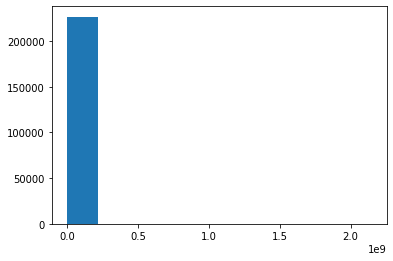

In [9]:
#Take a look at cooking time, the 'minutes' column
plt.hist(df['minutes']);  # find strange outliers 

(212195, 19)


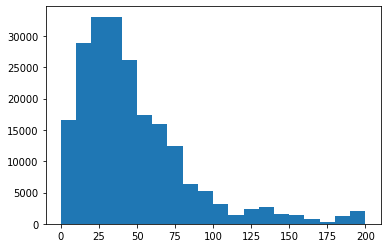

In [10]:
# Since we have enough data, let's only use cooking time < 200 minutes
df = df[df['minutes']<201] 
print(df.shape)
# plt.xscale('log')
plt.hist(df['minutes'], bins=20);

In [11]:
print(f"Amount the {df.shape[0]} recepies: ")
print()
print(f"Average cooking time: {round(df['minutes'].mean(),2)}")
print(f"Median cooking time: {df['minutes'].median()}")
print(f"Maximum cooking time: {df['minutes'].max()}")

Amount the 212195 recepies: 

Average cooking time: 44.98
Median cooking time: 35.0
Maximum cooking time: 200


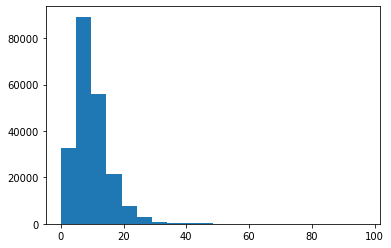

In [12]:
# number of steps
plt.hist(df['n_steps'], bins=20);

(208088, 19)


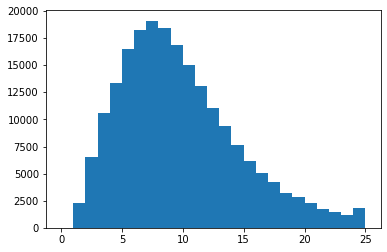

In [13]:
# Since we have enough data, let's only use number of steps <= 25
df = df[df['n_steps']<=25] 
print(df.shape)
plt.hist(df['n_steps'], bins=25);

In [14]:
print(f"Amount the {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of cooking steps: {round(df['n_steps'].mean(),2)}")
print(f"Median number of cooking steps:: {df['n_steps'].median()}")
print(f"Maximum number of cooking steps:: {df['n_steps'].max()}")

Amount the 208088 chosen recepies: 

Average number of cooking steps: 9.25
Median number of cooking steps:: 8.0
Maximum number of cooking steps:: 25


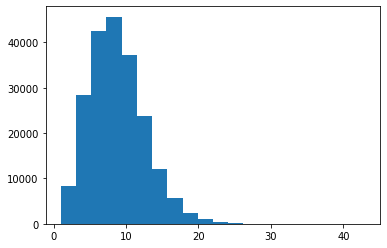

In [15]:
#number of ingredients
plt.hist(df['n_ingredients'], bins=20);

(207031, 19)


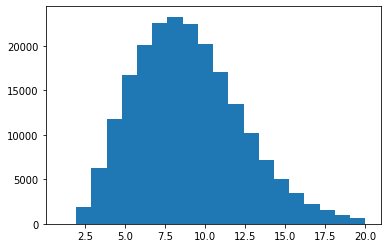

In [16]:
# Since we have enough data, let's only use number of ingredient <= 20
df = df[df['n_ingredients']<=20] 
print(df.shape)
plt.hist(df['n_ingredients'], bins=20);

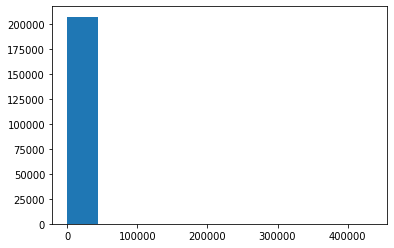

In [17]:
#Distribution of Calories
plt.hist(df['calories']);

(193249, 19)


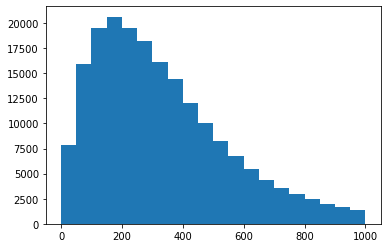

In [18]:
# Since we have enough data, let's only use number of clories <= 1_000
df = df[df['calories']<=1_000] 
print(df.shape)
plt.hist(df['calories'], bins=20);

In [19]:
print(f"Amount the {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of calories: {round(df['calories'].mean(),2)}")
print(f"Median number of calories: {df['calories'].median()}")
print(f"Maximum number of calories: {df['calories'].max()}")

Amount the 193249 chosen recepies: 

Average number of calories: 328.5
Median number of calories: 285.6
Maximum number of calories: 1000.0


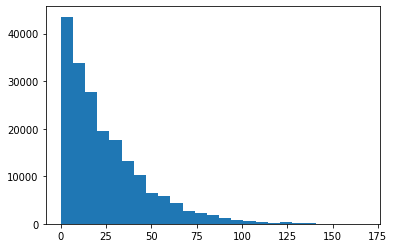

In [20]:
#Distribution of total fat
plt.hist(df['total_fat'], bins=25);

In [21]:
print(f"Amount the {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of total_fat: {round(df['total_fat'].mean(),2)}")
print(f"Median number of total_fat: {df['total_fat'].median()}")
print(f"Maximum number of total_fat: {df['total_fat'].max()}")

Amount the 193249 chosen recepies: 

Average number of total_fat: 24.23
Median number of total_fat: 18.0
Maximum number of total_fat: 168.0


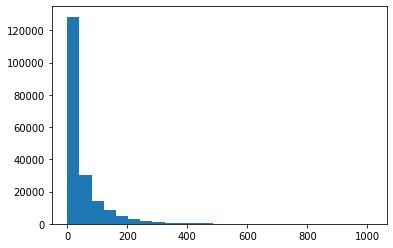

In [22]:
#distribution of suter
plt.hist(df['sugar'], bins=25);

Amount the 192342 chosen recepies: 

Average number of sugar: 46.4
Median number of sugar: 22.0
Maximum number of sugar: 500.0


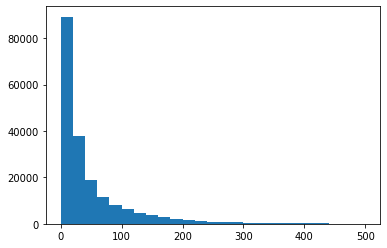

In [23]:
# Since we have enough data, let's only use number of clories <= 500
df = df[df['sugar']<=500] 
print(f"Amount the {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of sugar: {round(df['sugar'].mean(),2)}")
print(f"Median number of sugar: {df['sugar'].median()}")
print(f"Maximum number of sugar: {df['sugar'].max()}")
plt.hist(df['sugar'], bins=25);

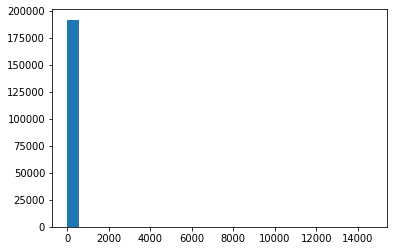

In [24]:
#Distribution of sodium
plt.hist(df['sodium'], bins=25);

Amount the 191481 chosen recepies: 

Average number of sodium: 20.06
Median number of sodium: 13.0
Maximum number of sodium: 200.0


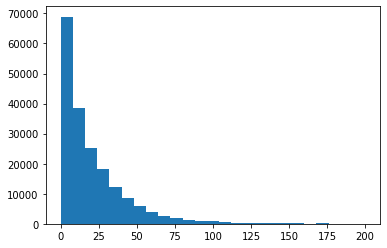

In [25]:
# Since we have enough data, let's only use sodium <= 200
df = df[df['sodium']<=200] 
plt.hist(df['sodium'], bins=25);
print(f"Amount the {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of sodium: {round(df['sodium'].mean(),2)}")
print(f"Median number of sodium: {df['sodium'].median()}")
print(f"Maximum number of sodium: {df['sodium'].max()}")

Amount the 191481 chosen recepies: 

Average number of protein: 27.51
Median number of protein: 15.0
Maximum number of protein: 342.0


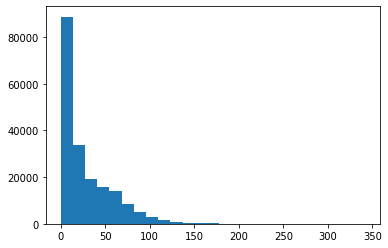

In [26]:
#Distribution of protein
print(f"Amount the {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of protein: {round(df['protein'].mean(),2)}")
print(f"Median number of protein: {df['protein'].median()}")
print(f"Maximum number of protein: {df['protein'].max()}")
plt.hist(df['protein'], bins=25);

Amount the 191481 chosen recepies: 

Average number of saturated fat: 30.76
Median number of saturated fat: 20.0
Maximum number of saturated fat: 471.0


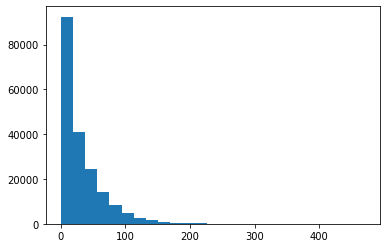

In [27]:
#Distribution of saturated fat
print(f"Amount the {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of saturated fat: {round(df['sat_fat'].mean(),2)}")
print(f"Median number of saturated fat: {df['sat_fat'].median()}")
print(f"Maximum number of saturated fat: {df['sat_fat'].max()}")
plt.hist(df['sat_fat'], bins=25);

Amount the 191481 chosen recepies: 

Average number of carbohydrates: 10.06
Median number of carbohydrates: 8.0
Maximum number of carbohydrates: 82.0


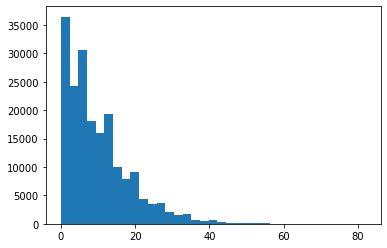

In [28]:
#Distribution of carbohydrates
print(f"Amount the {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of carbohydrates: {round(df['carbs'].mean(),2)}")
print(f"Median number of carbohydrates: {df['carbs'].median()}")
print(f"Maximum number of carbohydrates: {df['carbs'].max()}")
plt.hist(df['carbs'], bins=35);

In [29]:
#Save this cleaned dataframe to a new .csv file.
df.to_csv('organized_recipes.csv', index=False)

In [30]:
# Check in gredients change it to a list
df['ingredients'] = df['ingredients'].map(lambda s: s.strip('[').strip(']').replace("'", "").split(', '))

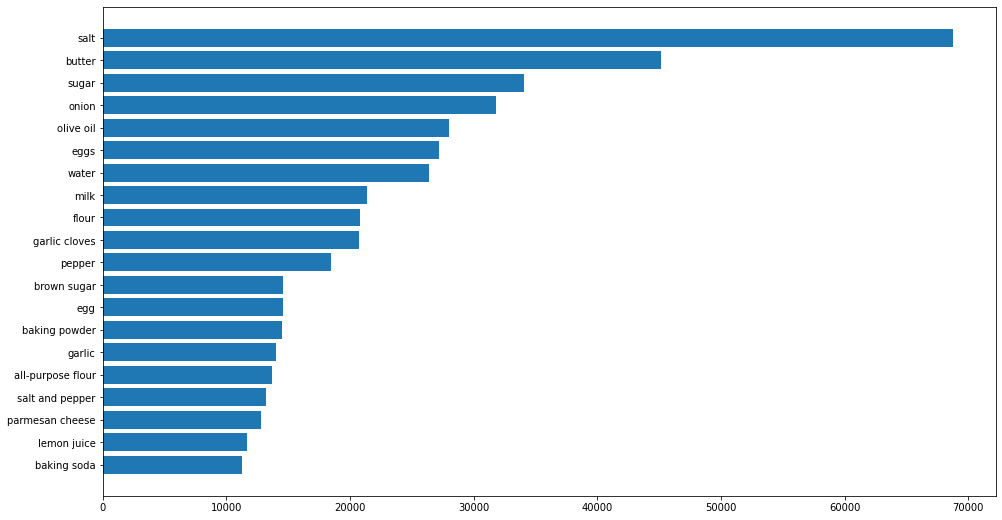

In [31]:
ingredient_list=[]
for row in df['ingredients']:
    ingredient_list.extend(row)

# Plot top 20 ingredients in the recipe data set.
plt.figure(figsize=(16,9))
plt.barh(pd.Series(ingredient_list).value_counts()[:20].index, pd.Series(ingredient_list).value_counts()[:20].values)
plt.gca().invert_yaxis();

In [32]:
# create a function to create a column for number of matches.
# return 3 most matched recipes.

def matches_df(column, df, user_input):    
    
    matches = []
    
    # split the entered keywords by comma
    import re
    keywords = re.split('; |, |,|\*|\n',user_input.lower())
#     keywords = user_input.lower().split(',')
    
    # create an empty list to store keywords
    keyword_list = []
    
    for i in range(len(keywords)):
        
        # remove white space
        keywords[i] = keywords[i].strip()
#         print(f'User Input: {keywords[i]}\n')
        # append it to keyword_list
        keyword_list.append(keywords[i])
    
    # separate each row
    for text in column:
        
        # initiate 0 as match
        match = 0
        
        # iterate through words in keyword_list
        for keyword in keyword_list:
            
            # if keyword found in text, assign 1 as match
            # stop comparing once assigned as 1, then append it to the list
            if keyword in text:
                match += 1
                #print(text)
#                 break
        matches.append(match)
        
    df['match'] = matches  
    return  df.sort_values(by=['match'], ascending=False).head(3)

# NOTE: USER INPUT, YOU NEED TO INPUT INGREDIENT

In [33]:
print('Please type in keywords separated by commas:\n')
user_input = input()

chosen_recipe = matches_df(df['ingredients'], df, user_input)

Please type in keywords separated by commas:

cheese, pepper, salt, onion, eggs, cheese


In [35]:
chosen_recipe

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,sat_fat,carbs,match
93796,golden chicken squares,113004,75,184723,2005-03-09,"['time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'main-dish', 'poultry', 'kid-friendly', 'chicken', 'dietary', 'one-dish-meal', 'comfort-food', 'toddler-friendly', 'meat', 'chicken-breasts', 'taste-mood', '4-hours-or-less']","[404.7, 35.0, 17.0, 59.0, 28.0, 40.0, 11.0]",12,"['put half of bread cubes in an 8 x 12"" greased pan', 'combine chicken , onion , mushroom soup , mayo and seasonings', 'spoon over bread cubes', 'top with remaining cubes of bread', 'beat eggs slightly and blend with milk', 'pour over bread', 'at this point , cover and refrigerate overnight if you choose to do so', 'if not , continue with below instructions without refrigerating', 'before baking , top with undiluted cream of chicken soup', 'bake at 325 for 1 hour', 'sprinkle cheese over top ...","yummy! cheesy, easy and wonderful... a kid pleaser! i always use a bit more cheese than it calls for... a mixture of mozzarella and cheddar. i fix it the night before one of those busy days and pop in the oven when i get home... you can also cook immediately. sooooooooo good.","[white bread, onion, cream of mushroom soup, salt, onion powder, milk, eggs, pepper, cream of chicken soup, chicken, mayonnaise, cheese]",12,404.7,35.0,17.0,59.0,28.0,40.0,11.0,6
13575,baked breakfast sandwich,33220,90,35140,2002-07-04,"['bacon', 'weeknight', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'breakfast', 'lunch', 'eggs-dairy', 'pork', 'cheese', 'eggs', 'dietary', 'sandwiches', 'meat', '4-hours-or-less']","[457.6, 43.0, 16.0, 42.0, 34.0, 50.0, 11.0]",10,"['trim and butter bread', 'arrange eight slices buttered side down in 9x13x2 pan', 'cover with sharp grated cheese', 'brown bacon , onion , celery , green pepper , salt and pepper together and pour on top of cheese', 'arrange tomato slices on top of bacon mixture', 'cover with remaining 8 slices bread', 'beat together the eggs , milk and mustard and pour over bread', 'top with more grated cheese', 'let stand overnight', 'bake at 350 for 1 hour']","a traditional southern breakfast served often before or after an early morning hunt. serve with baked grits, coffee, and juice.","[bread, cheese, tomatoes, bacon, onion, celery, green peppers, salt, pepper, eggs, milk, mustard]",12,457.6,43.0,16.0,42.0,34.0,50.0,11.0,6
188056,skillet corn scramble,394201,15,542159,2009-10-12,"['15-minutes-or-less', 'time-to-make', 'course', 'preparation', 'omelets-and-frittatas', 'breakfast', 'dietary', 'low-calorie', 'low-carb', 'low-in-something']","[171.0, 14.0, 12.0, 16.0, 19.0, 16.0, 4.0]",6,"['in fry pan , cook bacon until crisp', 'drain on paper towel , reserving 3 tablespoons drippings in fry pan', 'combine remaining ingredients and crumbled bacon', 'pour into fry pan', 'cook over low heat until eggs are set , stirring occasionally', 'sprinkle with cheese if using']","a hearty scrambled egg dish that is good for supper, brunch or breakfast. made this once to twice a week when i was pregnant. i like to add some cheese (parmesan, pepper jack, cheddar all work well)","[bacon, eggs, milk, green pepper, onion, salt, garlic powder, pepper, worcestershire sauce, corn, cheese]",11,171.0,14.0,12.0,16.0,19.0,16.0,4.0,6
